# ML Practical Lab 5

## Questions

### 1. How would you define clustering? Can you name two clustering algorithms?


Clustering is a machine learning technique used to group similar data points together into clusters, where data points within the same cluster are more similar to each other compared to those in other clusters. The goal of clustering is to identify patterns, relationships, or structures within the data without requiring explicit labels.

1. **K-Means Clustering**:
- K-Means is a popular partitioning algorithm that divides a dataset into a specified number of clusters (K) based on similarity.
- It iteratively assigns data points to the nearest cluster center and updates cluster centers based on the mean of assigned points.
- Convergence is reached when cluster centers stabilize or after a defined number of iterations.

2. **Hierarchical Clustering**:
- Hierarchical clustering builds a hierarchy of clusters by either merging (agglomerative) or splitting (divisive) clusters at each step.
- It starts with each data point as a single cluster and progressively merges or splits clusters based on a distance or similarity criterion.
- The result is often visualized using a dendrogram, which shows the clustering hierarchy.

### 2. What are some of the main applications of clustering algorithms?


- **Data Analysis**: Start by clustering data, then analyze each cluster individually.
- **Customer Segmentation**: Cluster customers based on their behaviors, allowing personalized strategies.
- **Recommender Systems**: Recommend content/products liked by others in the same cluster.
- **Anomaly Detection**: Spot anomalies with low affinity to all clusters, aiding fraud detection.
- **Semi-Supervised Learning**: Cluster, propagate labels, and improve supervised learning models.
- **Search Engine Optimization**: Use clustering to find similar images, enhancing search results.
- **Image Segmentation**: Group pixels by color and reduce image complexity for better object detection.
- **Dimensionality Reduction**: Achieve simpler data representation through clustering.

### 3. Describe the technique of the elbow rule to select the right number of clusters when using K-Means.


The "Elbow Rule" is a heuristic method used to determine the optimal number of clusters for K-Means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for a point on the plot that resembles an "elbow." The idea is to find the point where adding more clusters doesn't significantly reduce the WCSS, indicating a reasonable balance between minimizing intra-cluster variance and preventing overfitting.

Here's how to apply the Elbow Rule to select the right number of clusters:

1. Run K-Means for Various K:
    Start by running the K-Means algorithm for a range of K values (number of clusters).
    For each K, compute the sum of squared distances between data points and their cluster centers (WCSS).

2. Plot the WCSS:
    Plot the computed WCSS values against the corresponding K values.

3. Look for the Elbow Point:
    Examine the plot and identify the point where the decrease in WCSS slows down, creating an "elbow-like" bend.
    This point indicates that adding more clusters doesn't lead to a significant reduction in variance.

4. Select the Optimal K:
    The K value at the "elbow" is often considered the optimal number of clusters.
    However, the exact point might not always be clear, and the interpretation can be subjective.

It's important to note that the Elbow Rule is a heuristic and doesn't always provide a definitive answer. Sometimes, the plot might not exhibit a clear elbow, making it challenging to determine the optimal number of clusters. In such cases, other methods, like the Silhouette Score or Gap Statistic, can be used to aid in the decision-making process.

### 4. What is a silhouette score? How to use silhouette scores to select the right number of clusters when using K-Means?


A silhouette score is a measure of how similar a sample is to its own cluster compared to the samples in other clusters.
We plot the silhouette scores of as a function of k clusters and the higher the silhouette score, the more certain we are of the cluster number to choose.

### 5. Can you name and describe some K-Means improvement algorithms?

1. Accelerated K-Means - Proposed in 2003 by Charles Elkan
- Considerably accelerates by avoiding many unecessary distance calculations
- Exploiting the triangle inequality: a straight line is always the shortes distance between two points
- Keep track of lower and upper bounds for distances between instances and centroids
- the KMeans class uses this by default

2. Mini-batch K-Means - Proposed in 2010 by David Sculley
- instead of using the full dataset at each iteration, use mini-batches
- move the centroids just slightly at each iteration
- can speed up the algorithm typicaly by a factor of three or four
- makes it possible to cluster huge datasets that do not fit in memory
- its inertia is generally slightly worse, especially as the number of clusters increase

## Lab Practice
1. Download, open and run the program tut05.py. Read and understand the program.


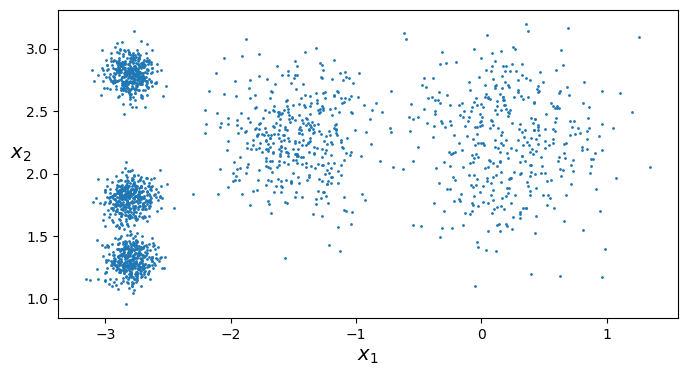

In [3]:
#Geron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow


import numpy as np
import matplotlib.pyplot as plt

################

from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])  # standard deviation

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
#plot them:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()


In [4]:
#############################

from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
y_pred = kmeans.fit_predict(X)
#Each instance was assigned to one of the 5 clusters:

print(f'y_pred: {y_pred}\n')
#array([4, 1, 0, ..., 3, 0, 1], dtype=int32)
print(f'Is y_pred == kmeans.labels? {y_pred is kmeans.labels_}\n')
#True

print(f'kmeans.cluster_centers_ : {kmeans.cluster_centers_}\n')
print(f'kmeans.labels_ : {kmeans.labels_}\n')

#predict the labels of new instances:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

print(f'X_new values: {X_new}\n')

print(f'Predicted cluster location: {kmeans.predict(X_new)}')
#array([0, 0, 3, 3], dtype=int32)



y_pred: [0 0 4 ... 3 1 0]

Is y_pred == kmeans.labels? True

kmeans.cluster_centers_ : [[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]

kmeans.labels_ : [0 0 4 ... 3 1 0]

X_new values: [[ 0.   2. ]
 [ 3.   2. ]
 [-3.   3. ]
 [-3.   2.5]]

Predicted cluster location: [4 4 3 3]


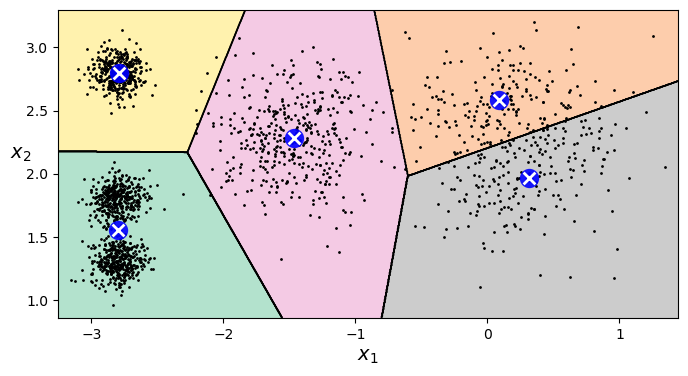

In [5]:
############

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='b', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()


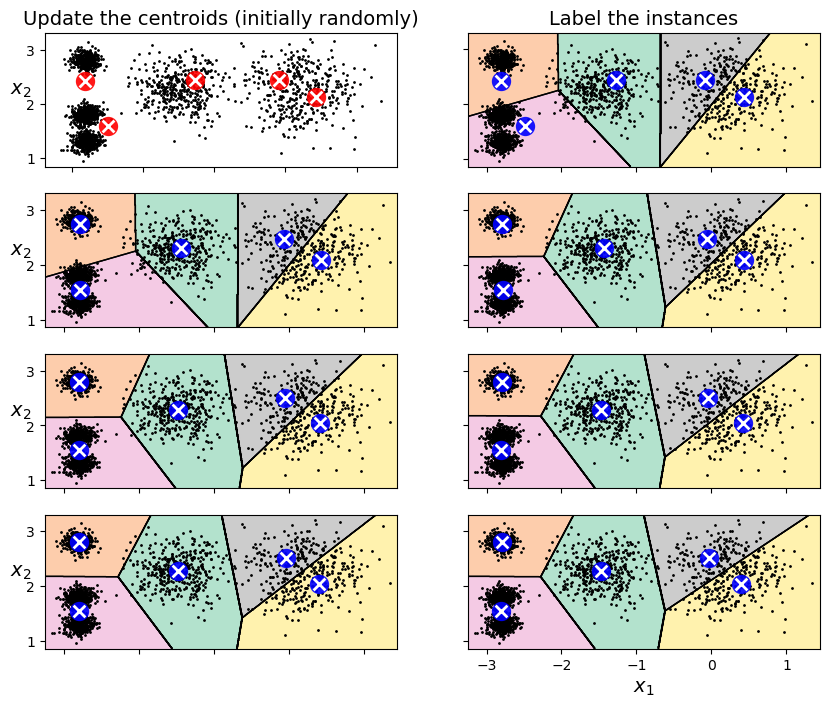

In [6]:

############## run Kmeans three times to show the movements of centroids
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=3, random_state=0)

# Q2.
kmeans_iter4 = KMeans(n_clusters=5, init="random", n_init=1,
                     max_iter=4, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# Q2.
kmeans_iter4.fit(X)

#plot this:

plt.figure(figsize=(10, 8))

plt.subplot(421)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(422)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(423)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(424)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(425)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(426)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)

plt.subplot(427)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_centroids=False)
plot_centroids(kmeans_iter4.cluster_centers_)

plt.subplot(428)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)

plt.show()


1) Understand each figure plotted. What is the purpose of the last figure?


The purpose of the last figure is to show the final clustering of the data

2) Revise the program by adding one more interation of running K-Means, and add the
result to the last figure.


On code

3) Observe the movements of the centroids.


The centroid moves towards the middle of the data

4) What happens if changing the number of clusters to 4 or 8 when running K-Means?

### 4 Clusters

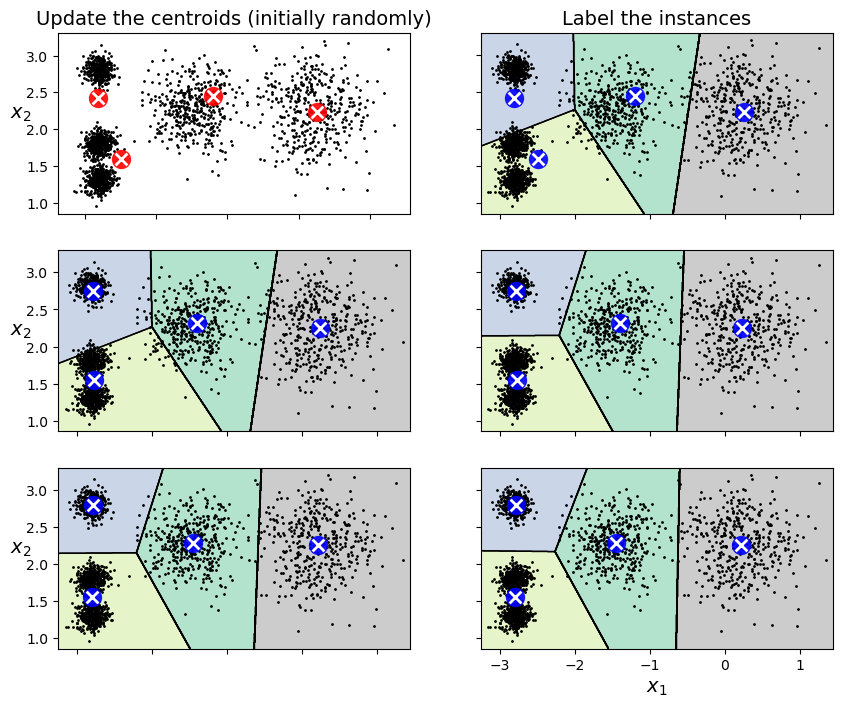

In [7]:

############## run Kmeans three times to show the movements of centroids
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

#plot this:

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### 8 Clusters

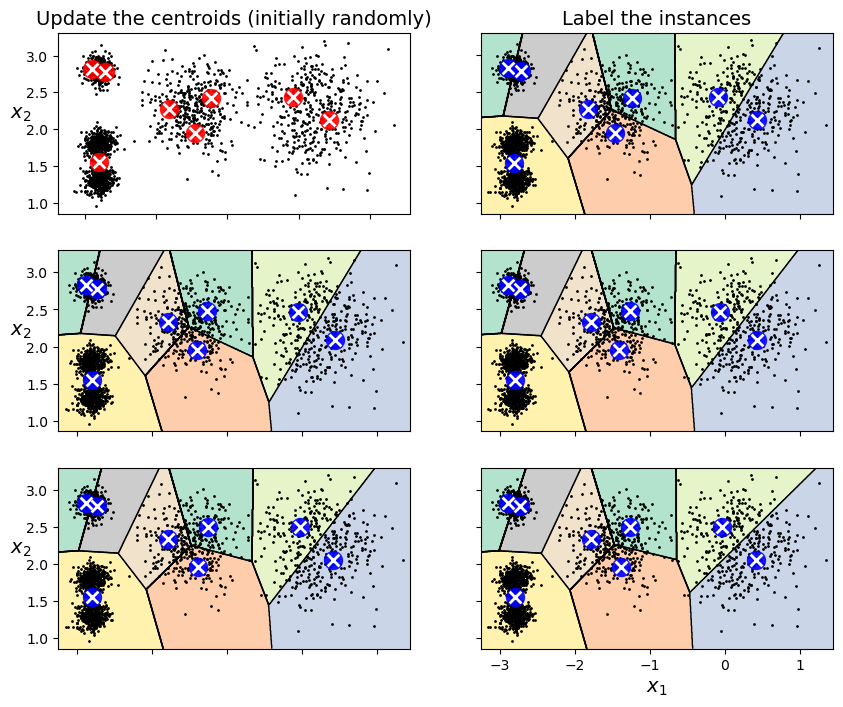

In [8]:

############## run Kmeans three times to show the movements of centroids
kmeans_iter1 = KMeans(n_clusters=8, init="random", n_init=1,
                     max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=8, init="random", n_init=1,
                     max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

#plot this:

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

## Find the optimum k

In [44]:
# train on 1 cluster
kmeans_X = KMeans(n_clusters=1, init="random", n_init=1,
                  max_iter=1, random_state=0)

# fit it on the data
kmeans_X.fit(X)

# SSW (inertia) == SST for 1 cluster
print(f'SSW for 1 cluster == SST : {kmeans_X.inertia_}') 


SSW for 1 cluster == SST : 3534.8360871670793


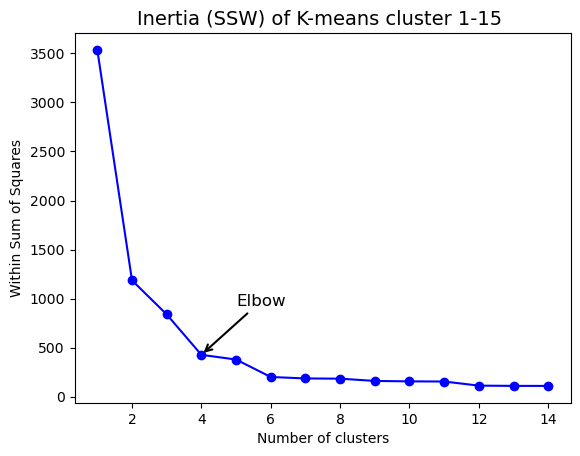

In [56]:
# plot SSW as a function of k

SSW = [] # list to hold inertia values

n = 15

for i in range(1,n):
    # train model in different clusters
    kmeans_X = KMeans(n_clusters=i, init="random", n_init=1,
                  max_iter=1, random_state=0)
    # fit it in the data
    kmeans_X.fit(X)
    #extract the SSW
    SSW.append(kmeans_X.inertia_)

# Plot 
plt.plot(range(1,n), SSW, 'bo-')
plt.title("Inertia (SSW) of K-means cluster 1-15 ", fontsize=14)
plt.ylabel("Within Sum of Squares", fontsize=10, rotation=90)
plt.xlabel("Number of clusters", fontsize=10, rotation=0)


# Find the elbow point by looking for a significant change in slope
elbow_point = None
for i in range(1, len(SSW) - 1):
    slope1 = (SSW[i] - SSW[i - 1])  # Change in slope to the left
    slope2 = (SSW[i + 1] - SSW[i])  # Change in slope to the right
    if abs(slope2 / slope1) < 0.12:  # You can adjust the threshold as needed
        elbow_point = i + 1
        break
        
# Highlight the elbow point with an arrow and text
if elbow_point:
    plt.annotate(
        "Elbow",
        xy=(elbow_point, SSW[elbow_point - 1]),  # Position of the arrowhead
        xytext=(elbow_point + 1, SSW[elbow_point - 1] + 500),  # Position of the text
        arrowprops=dict(arrowstyle="->", lw=1.5),  # Arrow style
        fontsize=12,  # Text font size
    )

plt.show()

# Silouhette score

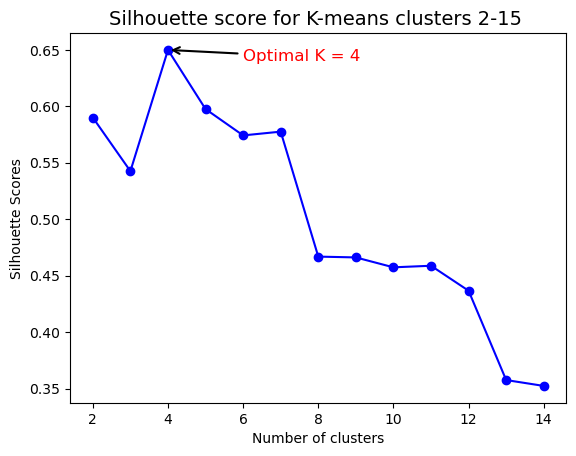

In [67]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for cluster 2-15

ss = []
n = 15


for i in range(2,n):
    # train model in different clusters
    kmeans_X = KMeans(n_clusters=i, init="random", n_init=1,
                  max_iter=1, random_state=0)
    # fit it in the data
    kmeans_X.fit(X)
    #extract the SSW
    ss.append(silhouette_score(X, kmeans_X.labels_))

# Find the optimal number of clusters with the highest silhouette score
optimal_k = 2 + ss.index(max(ss))

# Plot 
plt.plot(range(2,n), ss, 'bo-')
plt.title("Silhouette score for K-means clusters 2-15 ", fontsize=14)
plt.ylabel("Silhouette Scores", fontsize=10, rotation=90)
plt.xlabel("Number of clusters", fontsize=10, rotation=0)

# Annotate the point with the highest silhouette score
plt.annotate(
    f"Optimal K = {optimal_k}",
    xy=(optimal_k, max(ss)),
    xytext=(optimal_k + 2, max(ss)- 0.01),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12,
    color='red',
)

plt.show()



# Now that we have our best k-cluster (i.e. 4), let's retrain and map out the decision boundaries

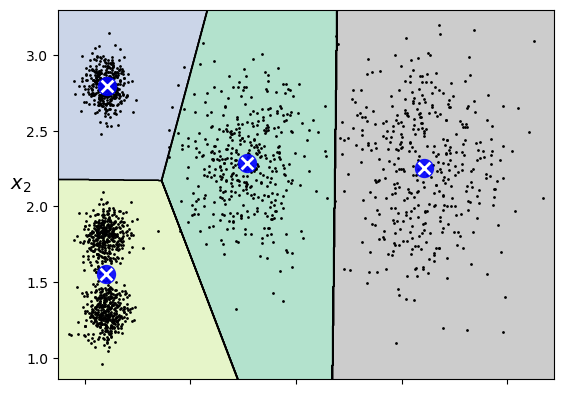

In [68]:
bestk = 4

kmeans_X = KMeans(n_clusters=bestk, init="random", n_init=1,
                  max_iter=10, random_state=0)

# fit it on the data
kmeans_X.fit(X)

# plot the cluster centroids and decision boundaries
plot_decision_boundaries(kmeans_X, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_X.cluster_centers_)
